In [1]:
cellpose_seg0 = r"output\test\2D_patch_test_0_seg.npy"
cellpose_seg1 = r"output\test\2D_patch_test_1_seg.npy"


In [119]:
import numpy as np
from cellpose import plot, utils, io, models
import matplotlib.pyplot as plt
from skimage.draw import polygon

# Load the segmentation mask
dat_0 = np.load(cellpose_seg0, allow_pickle=True).item()
# Extract the masks and generate outlines
masks_0 = dat_0['masks']
outlines_0 = utils.outlines_list(masks_0) # multiprocessing_threshold=1000



Multiprocessing is disabled for Windows


In [120]:
# Create a blank binary image to fill in the cells
filled_image_0 = np.zeros_like(masks_0, dtype=np.uint8)  # Start with black (0)

# Fill each outline's interior as white
for outline in outlines_0:
    # Ensure the outline coordinates are in integer format
    outline = np.array(outline, dtype=np.int32)
    
    # Get the rows and columns for the interior of each polygon
    rr, cc = polygon(outline[:, 1], outline[:, 0], filled_image_0.shape)
    filled_image_0[rr, cc] = 255  # Fill with white (255) inside each contour

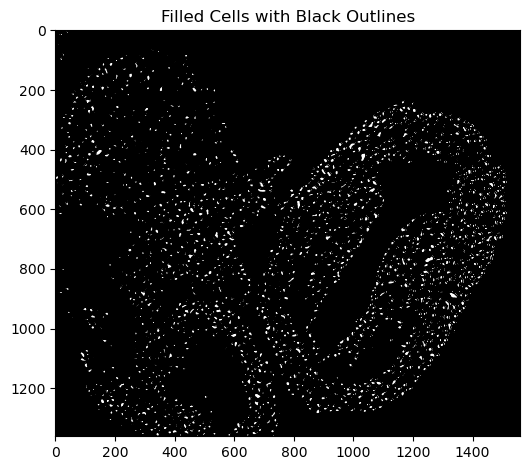

In [121]:
# Plot the filled binary image with black outlines
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(filled_image_0, cmap='gray', interpolation='none')
for outline in outlines_0:
    plt.plot(outline[:, 0], outline[:, 1], color='black', linewidth   =1)  # Add black outlines on top

ax.set_title("Filled Cells with Black Outlines")
ax.axis('on')
plt.show()

In [122]:
# Load the segmentation mask
dat_1 = np.load(cellpose_seg1, allow_pickle=True).item()
# Extract the masks and generate outlines
masks_1 = dat_1['masks']
outlines_1 = utils.outlines_list(masks_1) # multiprocessing_threshold=1000

Multiprocessing is disabled for Windows


In [123]:
# Create a blank binary image to fill in the cells
filled_image_1 = np.zeros_like(masks_1, dtype=np.uint8)  # Start with black (0)

# Fill each outline's interior as white
for outline in outlines_1:
    # Ensure the outline coordinates are in integer format
    outline = np.array(outline, dtype=np.int32)
    
    # Get the rows and columns for the interior of each polygon
    rr, cc = polygon(outline[:, 1], outline[:, 0], filled_image_1.shape)
    filled_image_1[rr, cc] = 255  # Fill with white (255) inside each contour

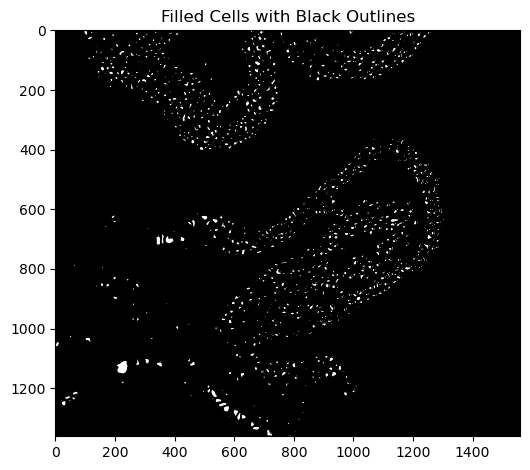

In [124]:
# Plot the filled binary image with black outlines
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(filled_image_1, cmap='gray', interpolation='none')
for outline in outlines_1:
    plt.plot(outline[:, 0], outline[:, 1], color='black', linewidth=1)  # Add black outlines on top

ax.set_title("Filled Cells with Black Outlines")
ax.axis('on')
plt.show()

In [125]:
# Define the shape of the new mask
mask_shape = (2478, 1560)

# Create a zero-filled mask
filled_image_new = np.zeros(mask_shape, dtype=np.uint8) 

# Define adjusted main segment coordinates
segments = [
    (0, 1362, 0, 1560),   # Segment 0
    (1116, 2478, 0, 1560) # Segment 1
]

# Offsets for each segment
offsets = [
    (0, 0),               # No offset for Segment 0
    (1116, 0)             # Offset for Segment 1 (row offset, column offset)
]

# New outline list
new_outlines = []

# Fill each outline's interior as white
for outline in outlines_0:
    # Add [1116, 0] to each coordinate in the outline
    outline = np.array(outline, dtype=np.int32) + np.array([0, 0], dtype=np.int32)
    new_outlines.append(outline)

    # Get the rows and columns for the interior of each polygon
    rr, cc = polygon(outline[:, 1], outline[:, 0], filled_image_new.shape)
    filled_image_new[rr, cc] = 155  # Fill with white (255) inside each contour

# Fill each outline's interior as white
for outline in outlines_1:
    # Add [1116, 0] to each coordinate in the outline
    outline = np.array(outline, dtype=np.int32) + np.array([0, 1116], dtype=np.int32)
    new_outlines.append(outline)
    
    # Get the rows and columns for the interior of each polygon
    rr, cc = polygon(outline[:, 1], outline[:, 0], filled_image_new.shape)
    filled_image_new[rr, cc] = 255  # Fill with white (255) inside each contour

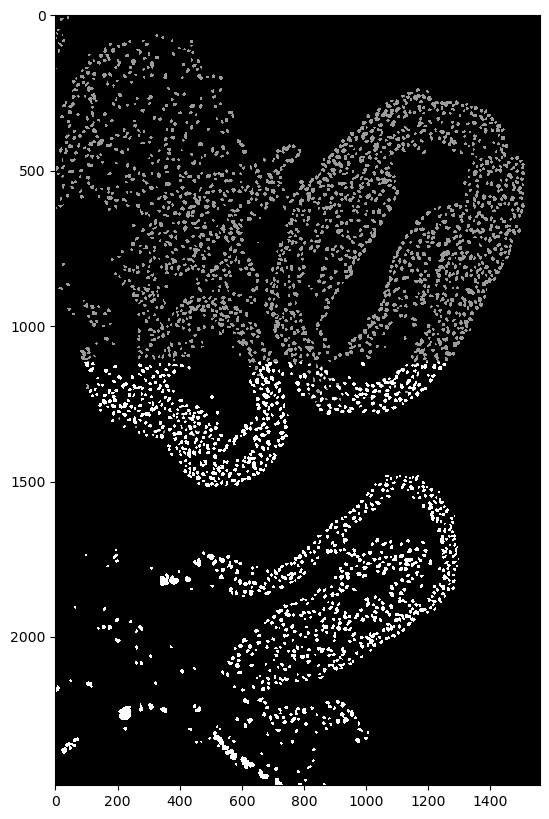

In [126]:
# Plot the filled binary image with black outlines
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(filled_image_new, cmap='gray', interpolation='none')

In [127]:
def calculate_overlap(segments):
    """
    Calculates the overlap region of segmentation and returns the coordinates.

    Parameters:
        segments (list of tuples): List of segment boundaries in the form
                                   (y_start, y_end, x_start, x_end).

    Returns:
        tuple: Overlap region as (y_start, y_end, x_start, x_end), or None if no overlap exists.
    """
    if len(segments) < 2:
        raise ValueError("At least two segments are required to calculate overlap.")

    # Extract boundaries for the two segments
    y_start1, y_end1, x_start1, x_end1 = segments[0]
    y_start2, y_end2, x_start2, x_end2 = segments[1]

    # Calculate overlap boundaries
    y_start_overlap = max(y_start1, y_start2)
    y_end_overlap = min(y_end1, y_end2)
    x_start_overlap = max(x_start1, x_start2)
    x_end_overlap = min(x_end1, x_end2)

    # Check if there is an actual overlap
    if y_start_overlap < y_end_overlap and x_start_overlap < x_end_overlap:
        return (y_start_overlap, y_end_overlap, x_start_overlap, x_end_overlap)
    else:
        return None  # No overlap exists


In [128]:
# Define segment boundaries
segments = [
    (0, 1362, 0, 1560),   # Segment 0
    (1116, 2478, 0, 1560) # Segment 1
]

# Calculate the overlap region
overlap_region = calculate_overlap(segments)

if overlap_region:
    print(f"Overlap region coordinates: {overlap_region}")
else:
    print("No overlap exists.")


Overlap region coordinates: (1116, 1362, 0, 1560)


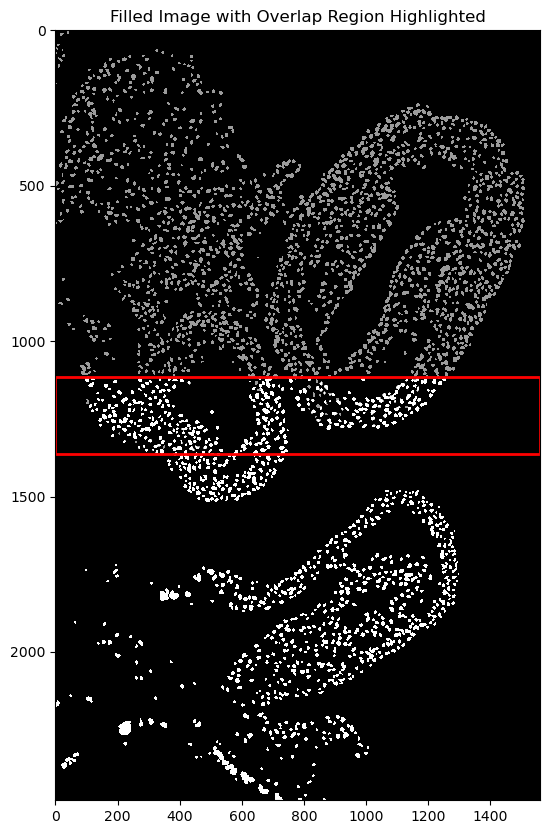

In [129]:
import matplotlib.patches as patches

# Plot the filled binary image with the overlap rectangle
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(filled_image_new, cmap='gray', interpolation='none')

if overlap_region:
    y_start, y_end, x_start, x_end = overlap_region
    # Draw the overlap rectangle
    rect = patches.Rectangle(
        (x_start, y_start),  # Bottom-left corner
        x_end - x_start,     # Width
        y_end - y_start,     # Height
        linewidth=2,
        edgecolor='red',
        facecolor='none'     # Transparent fill
    )
    ax.add_patch(rect)

# Add labels and display the figure
ax.set_title("Filled Image with Overlap Region Highlighted")
plt.show()


In [130]:
import pandas as pd

def boundaries_to_table(boundaries):
    # Create an empty list to store data rows
    data = []
    
    # Loop through each boundary (each cell)
    for cell_id, boundary in enumerate(boundaries, start=1):
        # Loop through each point in the boundary
        for point in boundary:
            # Append cell_id, x, y to the data list
            data.append([cell_id, point[0], point[1]])
    
    # Create a DataFrame with the data
    df = pd.DataFrame(data, columns=['cell_id', 'vertex_x', 'vertex_y'])
    
    return df

In [131]:
# Convert boundaries to table
df_outlines_list = boundaries_to_table(new_outlines)
df_outlines_list

,cell_id,vertex_x,vertex_y
0,1,40,3
1,1,39,4
2,1,38,5
3,1,37,6
4,1,37,7
...,...,...,...
103470,3122,869,2475
103471,3122,868,2474
103472,3122,867,2473
103473,3122,866,2472


In [132]:
def reduce_points(df):
    # Group by cell_id and get counts
    cell_counts = df.groupby('cell_id').size()
    
    new_df = pd.DataFrame()
    
    for cell_id in cell_counts.index:
        cell_data = df[df['cell_id'] == cell_id]
        
        if cell_counts[cell_id] > 50:
            # Keep every other row until we have 50 points
            reduced_data = cell_data.iloc[::2].head(50)
        elif 30 < cell_counts[cell_id] <= 50:
            # Keep every other row until we have 30 points
            reduced_data = cell_data.iloc[::2].head(30)
        else:
            # Keep all points if count <= 30
            reduced_data = cell_data
            
        new_df = pd.concat([new_df, reduced_data])
    
    return new_df.reset_index(drop=True)

In [133]:
# Apply the function
reduced_outlines_list = reduce_points(df_outlines_list)

# Print the results
print("Original shape:", df_outlines_list.shape)
print("Reduced shape:", reduced_outlines_list.shape)


Original shape: (103475, 3)
Reduced shape: (69069, 3)


In [134]:
# Process to append the first row of each cell group
Outlines_list_final = (
    reduced_outlines_list.groupby('cell_id', group_keys=False)
    .apply(lambda group: pd.concat([group, group.iloc[[0]]], ignore_index=True))
)


C:\Users\Alexis\AppData\Local\Temp\ipykernel_131992\2406211764.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: pd.concat([group, group.iloc[[0]]], ignore_index=True))


In [135]:
Outlines_list_final

,cell_id,vertex_x,vertex_y
0,1,40,3
1,1,39,4
2,1,38,5
3,1,37,6
4,1,37,7
...,...,...,...
18,3122,868,2474
19,3122,867,2473
20,3122,866,2472
21,3122,865,2472


In [136]:
unique_cell_count = Outlines_list_final['cell_id'].nunique()
# unique_cell_count = boundary_df['cell_id'].nunique()

unique_cell_count

3122

In [137]:

def calculate_centroids(df):
    # Group the DataFrame by 'cell_id'
    grouped = df.groupby('cell_id')
    
    # Calculate centroids for each group
    centroids = grouped[['vertex_x', 'vertex_y']].mean().reset_index()
    
    # Rename columns if needed to indicate centroids explicitly
    centroids.rename(columns={'vertex_x': 'centroid_x', 'vertex_y': 'centroid_y'}, inplace=True)
    
    return centroids


In [138]:
# Calculate centroids for each cell
centroids_df = calculate_centroids(Outlines_list_final)
centroids_df

,cell_id,centroid_x,centroid_y
0,1,41.280000,7.080000
1,2,21.000000,12.724138
2,3,9.904762,46.857143
3,4,4.869565,58.391304
4,5,327.423077,65.461538
...,...,...,...
3117,3118,673.257143,2450.114286
3118,3119,717.825000,2467.550000
3119,3120,805.000000,2461.826087
3120,3121,788.176471,2473.941176


In [139]:
overlap_region

(1116, 1362, 0, 1560)

In [140]:
import pandas as pd

def filter_centroids_in_overlap(centroid_df, overlap_region):
    """
    Filters centroids within a specified overlap region.

    Parameters:
        centroid_df (pd.DataFrame): DataFrame with columns 'cell_id', 'centroid_x', 'centroid_y'.
        overlap_region (tuple): Overlap region defined as (y_start, y_end, x_start, x_end).

    Returns:
        pd.DataFrame: Subset of the input DataFrame with centroids in the overlap region.
    """
    y_start, y_end, x_start, x_end = overlap_region

    # Filter the DataFrame for centroids within the overlap region
    filtered_df = centroid_df[
        (centroid_df['centroid_y'] >= y_start) &
        (centroid_df['centroid_y'] <= y_end) &
        (centroid_df['centroid_x'] >= x_start) &
        (centroid_df['centroid_x'] <= x_end)
    ]

    return filtered_df



# Call the function
sub_dataframe = filter_centroids_in_overlap(centroids_df, overlap_region)

# Display the result
sub_dataframe


,cell_id,centroid_x,centroid_y
1701,1702,103.583333,1123.041667
1702,1703,658.103448,1119.172414
1703,1704,690.904762,1121.761905
1704,1705,756.280000,1124.760000
1705,1706,990.263158,1122.157895
...,...,...,...
2363,2364,326.913043,1356.304348
2364,2365,597.869565,1355.217391
2365,2366,419.448276,1357.931034
2366,2367,732.090909,1359.590909


In [141]:
Outlines_list_final

,cell_id,vertex_x,vertex_y
0,1,40,3
1,1,39,4
2,1,38,5
3,1,37,6
4,1,37,7
...,...,...,...
18,3122,868,2474
19,3122,867,2473
20,3122,866,2472
21,3122,865,2472


In [142]:
def filter_outlines_by_cell_ids(outlines_df, sub_dataframe):

    # Get the set of cell_ids from the sub_centroid_df
    cell_ids_to_keep = set(sub_dataframe['cell_id'])
    
    # Filter the outlines_df to include only rows with cell_id in the set
    filtered_outlines_df = outlines_df[outlines_df['cell_id'].isin(cell_ids_to_keep)]
    
    return filtered_outlines_df


In [143]:
# Call the function to filter outlines
filtered_outlines_df = filter_outlines_by_cell_ids(Outlines_list_final, sub_dataframe)

# Display the filtered outlines
filtered_outlines_df

,cell_id,vertex_x,vertex_y
0,1702,104,1114
1,1702,102,1115
2,1702,100,1117
3,1702,98,1118
4,1702,97,1120
...,...,...,...
22,2368,479,1355
23,2368,478,1355
24,2368,477,1354
25,2368,476,1354


In [165]:
filtered_outlines_df

,cell_id,vertex_x,vertex_y
0,1702,104,1114
1,1702,102,1115
2,1702,100,1117
3,1702,98,1118
4,1702,97,1120
...,...,...,...
22,2368,479,1355
23,2368,478,1355
24,2368,477,1354
25,2368,476,1354


In [166]:
import numpy as np

def dataframe_to_outline_list(filtered_outlines):

    outline_list = []
    
    # Group by 'cell_id' and extract vertices for each cell
    grouped = filtered_outlines.groupby('cell_id')
    for _, group in grouped:
        # Extract (vertex_x, vertex_y) as a NumPy array
        outline = group[['vertex_x', 'vertex_y']].to_numpy(dtype=np.int32)
        outline_list.append(outline)
    
    return outline_list

overlap_outline_list = dataframe_to_outline_list(filtered_outlines_df)

# # Display the result
# for outline in overlap_outline_list:
#     print(outline)


In [167]:
overlap_outline_list

[array([[ 104, 1114],
        [ 102, 1115],
        [ 100, 1117],
        [  98, 1118],
        [  97, 1120],
        [  96, 1122],
        [  96, 1124],
        [  97, 1126],
        [  99, 1128],
        [ 100, 1130],
        [ 102, 1131],
        [ 104, 1132],
        [ 106, 1132],
        [ 108, 1131],
        [ 109, 1130],
        [ 109, 1128],
        [ 109, 1126],
        [ 108, 1124],
        [ 108, 1122],
        [ 108, 1120],
        [ 108, 1118],
        [ 108, 1116],
        [ 106, 1115],
        [ 104, 1114]]),
 array([[ 655, 1115],
        [ 655, 1116],
        [ 654, 1117],
        [ 653, 1118],
        [ 654, 1119],
        [ 654, 1120],
        [ 655, 1121],
        [ 655, 1122],
        [ 655, 1123],
        [ 656, 1124],
        [ 657, 1125],
        [ 658, 1125],
        [ 659, 1125],
        [ 660, 1124],
        [ 661, 1123],
        [ 662, 1122],
        [ 663, 1121],
        [ 663, 1120],
        [ 663, 1119],
        [ 663, 1118],
        [ 662, 1117],
        

C:\Users\Alexis\AppData\Local\Temp\ipykernel_131992\1139580405.py:19: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 256 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  image_array[rr, cc] = label
C:\Users\Alexis\AppData\Local\Temp\ipykernel_131992\1139580405.py:19: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 257 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  image_array[rr, cc] = label
C:\Users\Alexis\AppData\Local\Temp\ipykernel_131992\1139580405.py:19: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 258 to uint8 will fail in the future.
For th

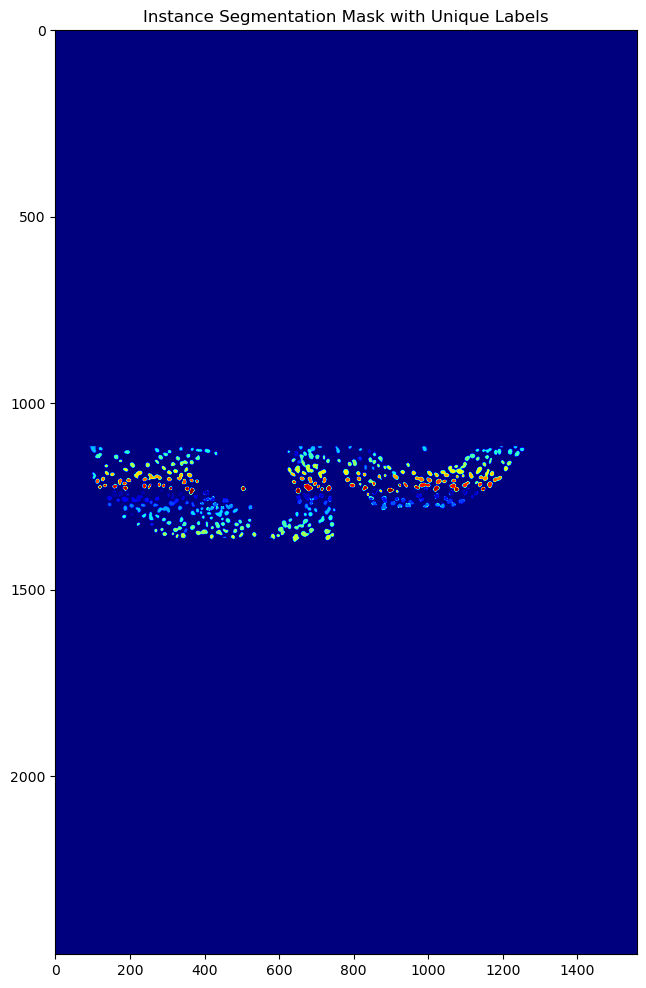

In [171]:
# Iterate over polygons and assign each one a unique label
# Create a blank canvas (e.g., 800x800)
from shapely.geometry import Polygon
from skimage.draw import polygon 
image_array = np.zeros((2478, 1560), dtype=np.uint8)


for label, poly_coords in enumerate(overlap_outline_list, start=1):
    # Create a Shapely polygon from the coordinates
    polygon_obj = Polygon(poly_coords)

    # Extract x and y coordinates for drawing
    x_coords, y_coords = poly_coords[:, 0], poly_coords[:, 1]

    # Convert polygon coordinates to pixel coordinates and rasterize
    rr, cc = polygon(y_coords, x_coords, shape=image_array.shape)

    # Assign the unique label to the instance in the image (label 1, 2, 3, ...)
    image_array[rr, cc] = label

# Visualize the result
plt.figure(figsize=(12, 12))
plt.imshow(image_array, cmap='jet')
plt.title('Instance Segmentation Mask with Unique Labels')
plt.axis('on')
plt.show()

In [161]:
cell_groups = Outlines_list_final.groupby('cell_id')

cell_groups


In [159]:
# cell_groups = pd.DataFrame(cell_groups)
# cell_groups

In [ ]:
ious = []
iou_threshold = 0.4
matched_test_instances = set()  # To track test instances that have been matched

comparison_data = []

